<a href="https://colab.research.google.com/github/EdVKu/Econophysics_Projects/blob/main/Copia_de_Ej5_Nikei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Se descargarán los datos presentes en el índice Nikkei
#Las epocas se dividiran en 20 dias
import numpy as np
import pandas as pd
import seaborn as sb
np.random.seed(1300)

nikei =pd.read_csv('/content/drive/MyDrive/Classroom/TSFMT-II(2024-1) Física/Nikkei-2010-2012.csv',
                   index_col = 'Ticker')
nikei = nikei.drop_duplicates()
nikei = nikei.dropna()

In [ ]:
nikei.T[['4151.t']]

Ticker      4151.t
2010-01-04   999.0
2010-01-05   989.0
2010-01-06  1003.0
2010-01-07   984.0
2010-01-08   991.0
...            ...
2012-12-21   852.0
2012-12-25   856.0
2012-12-26   850.0
2012-12-27   851.0
2012-12-28   849.0

[736 rows x 1 columns]

In [ ]:
epochs = [nikei.T[20*(n):20*(n+1)] for n in range(int(len(nikei.T)/20)+1)]
rend = []
fechas2 = []
fechas = nikei.columns
indices = nikei.T.columns
for n in range(int(len(nikei.T)-1)):
  dif = nikei.iloc[:,n+1]-nikei.iloc[:,n]
  resep = [dif[(t)]/nikei.T.iloc[n][t] for t in indices]
  rend.append(resep)
  fechas2.append(fechas.drop(fechas[len(fechas)-1]))
rend2 = pd.DataFrame(rend)

In [ ]:
rend2=pd.DataFrame(rend, columns = indices).T

In [ ]:
rend2.columns = fechas[0:len(fechas)-1]

In [ ]:
epochs = [rend2.T[20*(n):20*(n+1)] for n in range(int(len(rend2.T)/20)+1)]


In [ ]:
ep1 = pd.DataFrame(np.transpose(rend[0:19]))



In [ ]:
len(fechas2[2])

735

In [ ]:


def returns(A):
  h=[]
  for i in A[0]:
    h.append([A[i][j]-A[i][j-1]/A[i][j-1] for j in A.T[0]])



#np.corrcoef() (coef. de correlación Pearson)
#np.corr() (correlación Pearson)

In [ ]:
def cwoe(a,t):
    return  1/t*(np.matmul(a,a.T))
epochs0 = [np.transpose(epochs[i]) for i in range(len(epochs))]
corR = [cwoe(epochs0[i],20) for i in range(len(epochs0))]
corrm = [cwoe(epochs0[i],20).corr() for i in range(len(epochs0))]
corrm

<ipython-input-11-6e4c2c605ad9>:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  return  1/t*(np.matmul(a,a.T))


[          0         1         2         3         4         5         6    \
 0    1.000000  0.248244  0.544353  0.428022  0.649168  0.595296  0.718936   
 1    0.248244  1.000000  0.724582  0.432678  0.521598  0.505666  0.625785   
 2    0.544353  0.724582  1.000000  0.792280  0.760604  0.668997  0.869849   
 3    0.428022  0.432678  0.792280  1.000000  0.601562  0.565544  0.756881   
 4    0.649168  0.521598  0.760604  0.601562  1.000000  0.739729  0.742268   
 ..        ...       ...       ...       ...       ...       ...       ...   
 205 -0.393558  0.244540  0.107324  0.052713  0.031269 -0.067924 -0.172725   
 206 -0.428684  0.020123  0.077214  0.108623 -0.088301 -0.219141 -0.162013   
 207  0.188780  0.307381  0.457162  0.263425  0.360959  0.441950  0.256936   
 208 -0.466909  0.176788  0.062031  0.021448 -0.175686 -0.089710 -0.050736   
 209 -0.137348  0.252616  0.160336 -0.042448  0.021327  0.017421  0.125148   
 
           7         8         9    ...       200       201   

In [ ]:
def Eighist(Df):
  for i in range(len(Df)):
    corrs = np.linalg.eigvals(Df[i])
  return corrs
corR

[             0         1         2         3         4         5    \
 Ticker                                                               
 4151.t  0.000297  0.000043  0.000093  0.000076  0.000165  0.000072   
 4502.t  0.000043  0.000082  0.000072  0.000039  0.000064  0.000028   
 4503.t  0.000093  0.000072  0.000131  0.000084  0.000122  0.000052   
 4506.t  0.000076  0.000039  0.000084  0.000111  0.000074  0.000038   
 4507.t  0.000165  0.000064  0.000122  0.000074  0.000232  0.000096   
 ...          ...       ...       ...       ...       ...       ...   
 9501.t -0.000022  0.000022  0.000025  0.000004  0.000021  0.000004   
 9502.t -0.000030  0.000002  0.000014  0.000015 -0.000001 -0.000007   
 9503.t  0.000011  0.000008  0.000024  0.000011  0.000029  0.000018   
 9531.t -0.000039  0.000004  0.000008  0.000001 -0.000010 -0.000004   
 9532.t -0.000014  0.000013  0.000028  0.000010  0.000027  0.000006   
 
                  6         7         8             9    ...           200 

In [ ]:
len(corrm)

37

<Axes: >

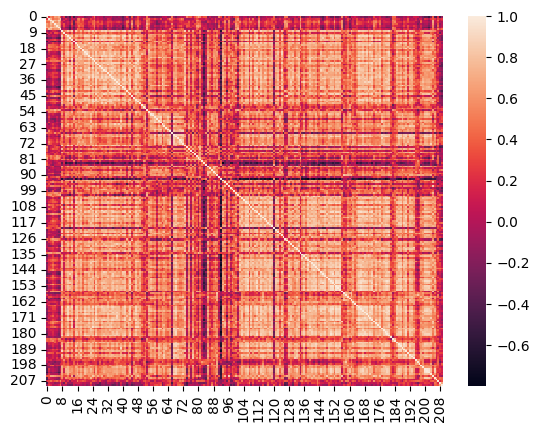

In [ ]:
sb.heatmap(corrm[0])

<Axes: >

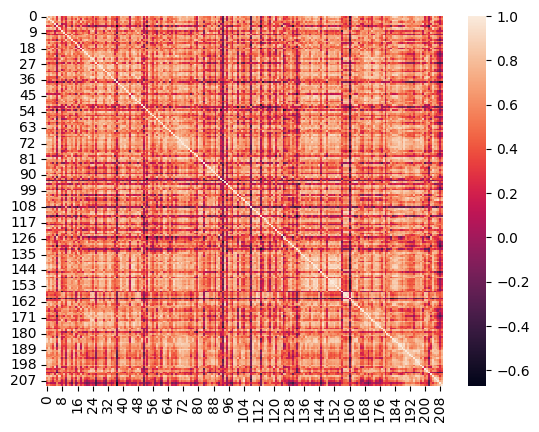

In [ ]:
sb.heatmap(corrm[1])

<Axes: >

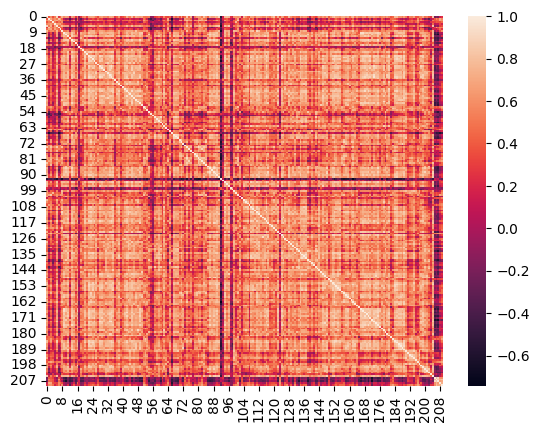

In [ ]:
sb.heatmap(corrm[2])

<Axes: >

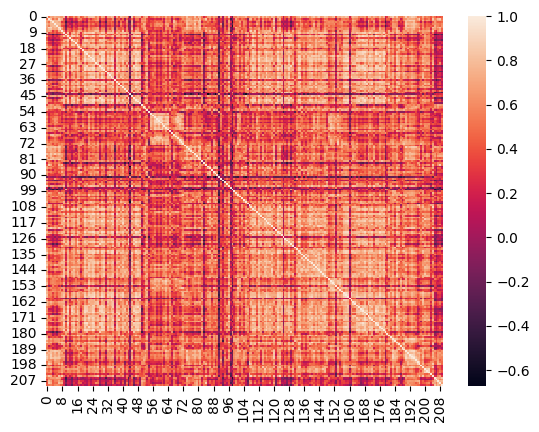

In [ ]:
sb.heatmap(corrm[3])

<Axes: >

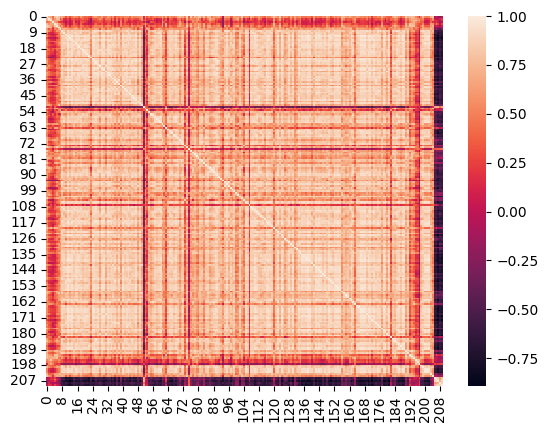

In [ ]:
sb.heatmap(corrm[4])

<Axes: >

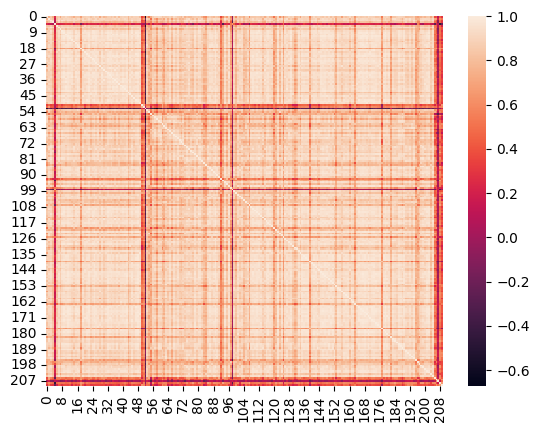

In [ ]:
sb.heatmap(corrm[5])

<Axes: >

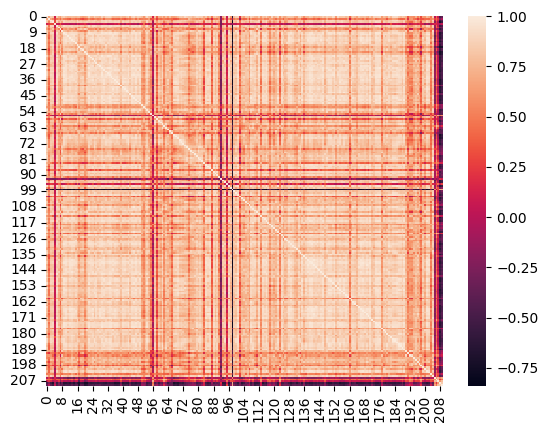

In [ ]:
sb.heatmap(corrm[6])

<Axes: >

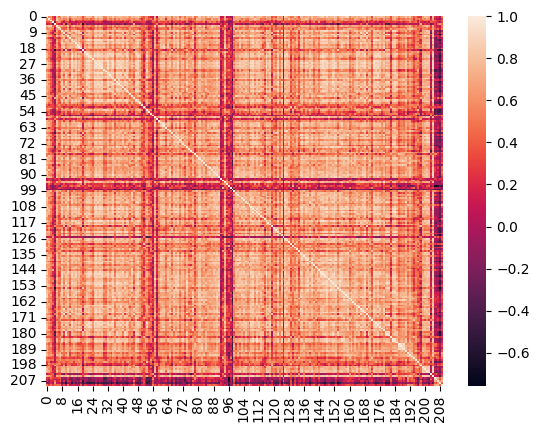

In [ ]:
sb.heatmap(corrm[7])

<Axes: >

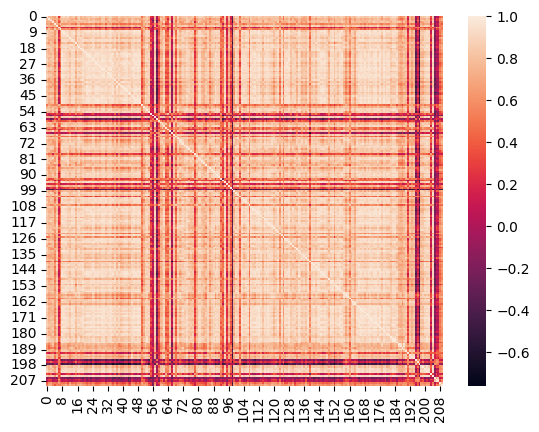

In [ ]:
sb.heatmap(corrm[8])

<Axes: >

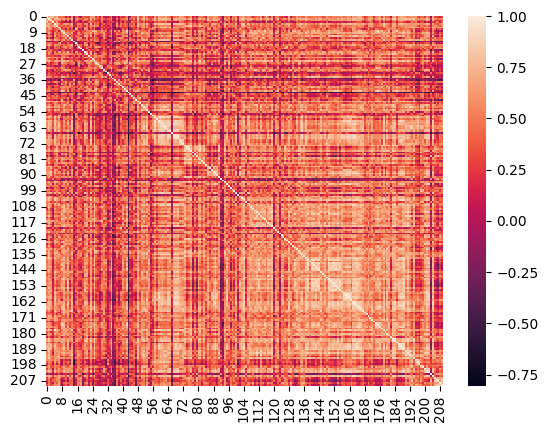

In [ ]:
sb.heatmap(corrm[9])

<Axes: >

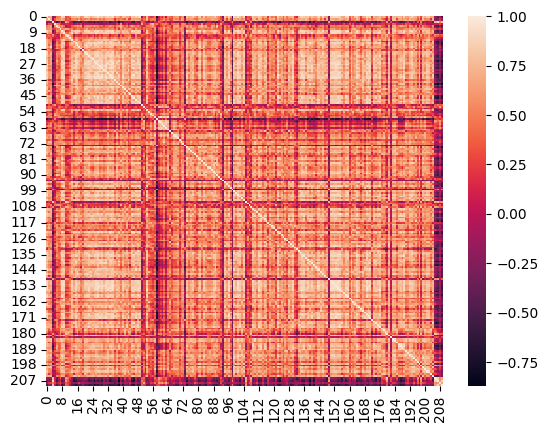

In [ ]:
sb.heatmap(corrm[10])

<Axes: >

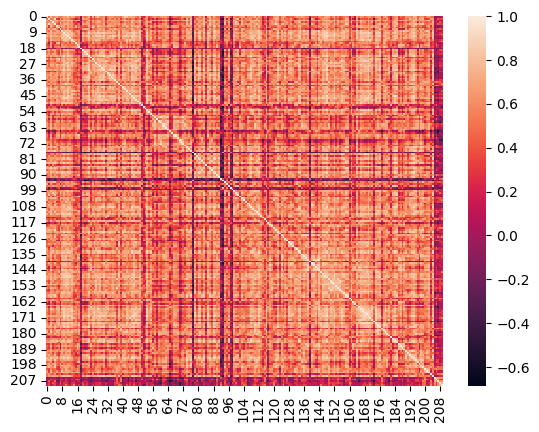

In [ ]:
sb.heatmap(corrm[11])

<Axes: >

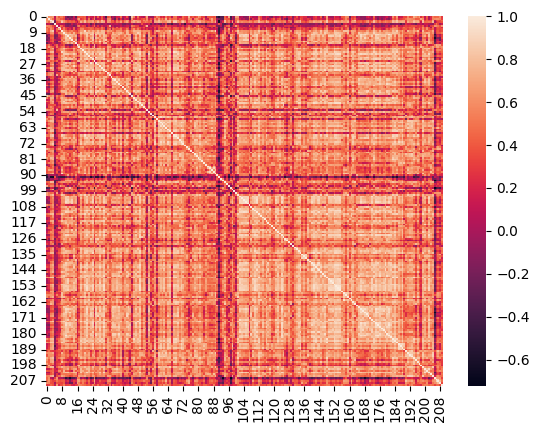

In [ ]:
sb.heatmap(corrm[12])

<Axes: >

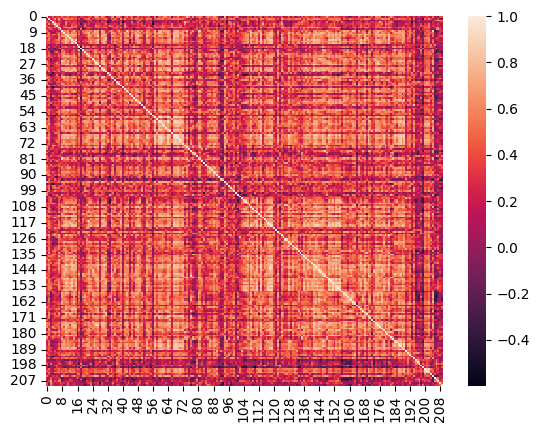

In [ ]:
sb.heatmap(corrm[13])

<Axes: >

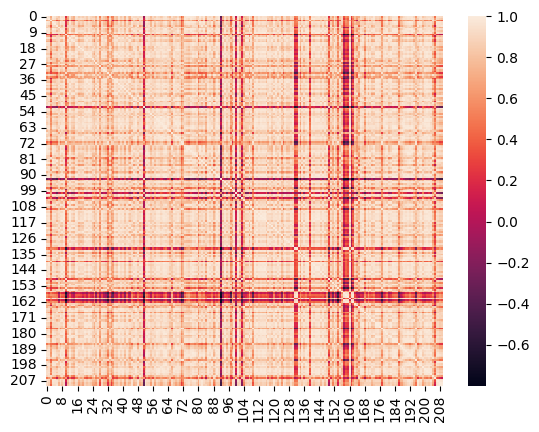

In [ ]:
sb.heatmap(corrm[14])

<Axes: >

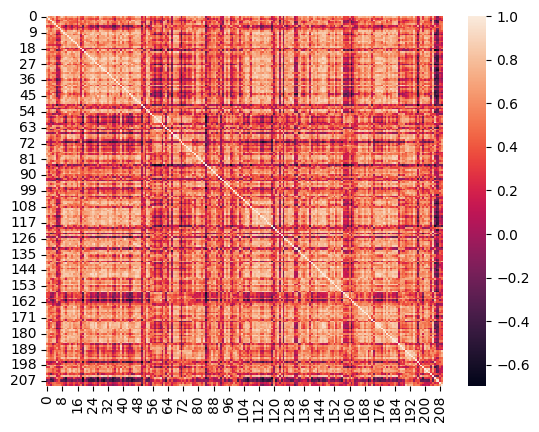

In [ ]:
sb.heatmap(corrm[15])

<Axes: >

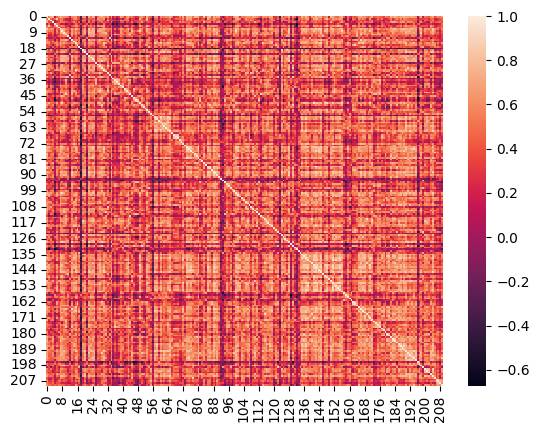

In [ ]:
sb.heatmap(corrm[16])

In [ ]:
sb.heatmap(corrm[17])

In [ ]:
sb.heatmap(corrm[18])

In [ ]:
sb.heatmap(corrm[19])

<Axes: >

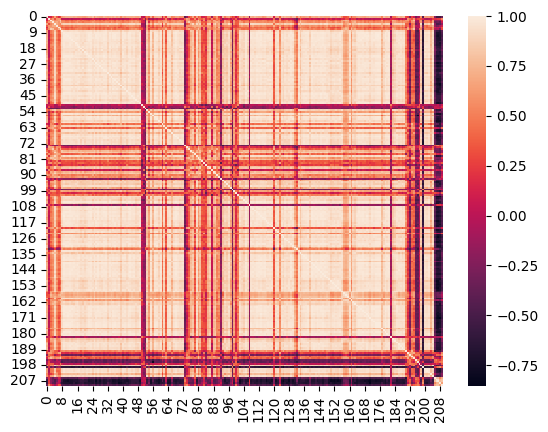

In [ ]:
sb.heatmap(corrm[20])

<Axes: >

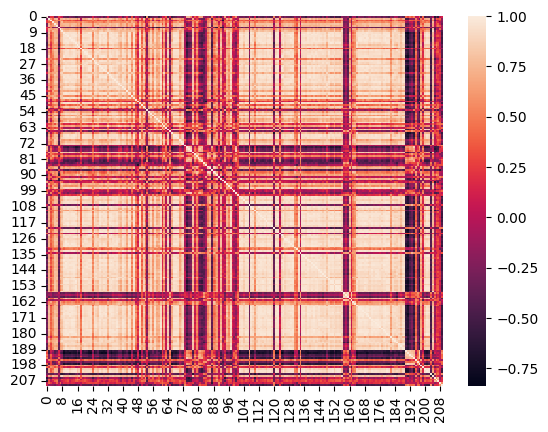

In [ ]:
sb.heatmap(corrm[21])

<Axes: >

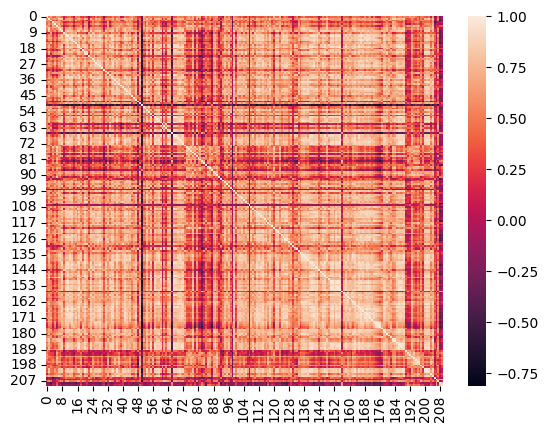

In [ ]:
sb.heatmap(corrm[22])

<Axes: >

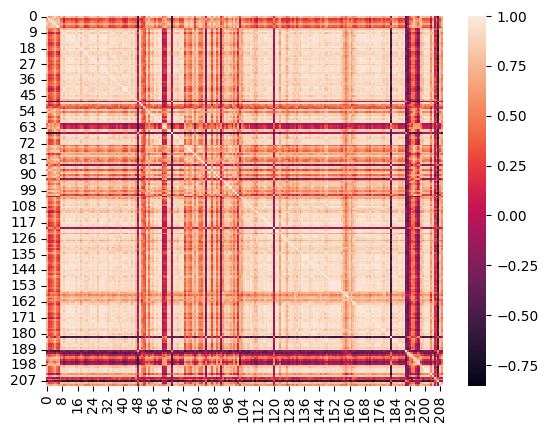

In [ ]:
sb.heatmap(corrm[23])

<Axes: >

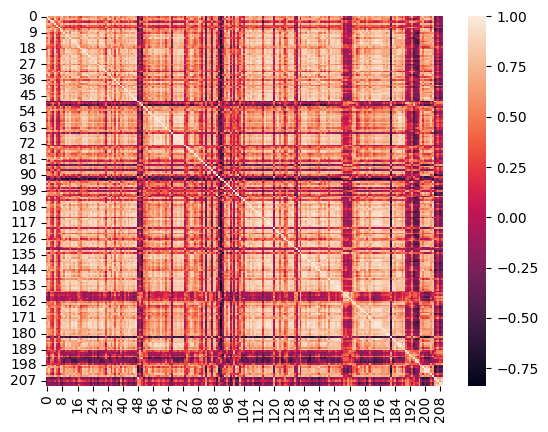

In [ ]:
sb.heatmap(corrm[24])

<Axes: >

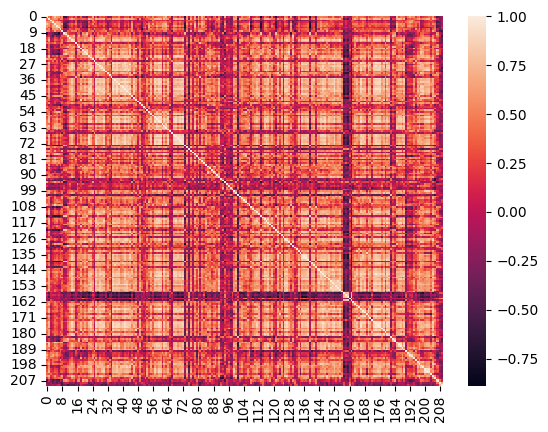

In [ ]:
sb.heatmap(corrm[25])

In [ ]:
sb.heatmap(corrm[26])

In [ ]:
sb.heatmap(corrm[27])

In [ ]:
sb.heatmap(corrm[28])

In [ ]:
sb.heatmap(corrm[29])

<Axes: >

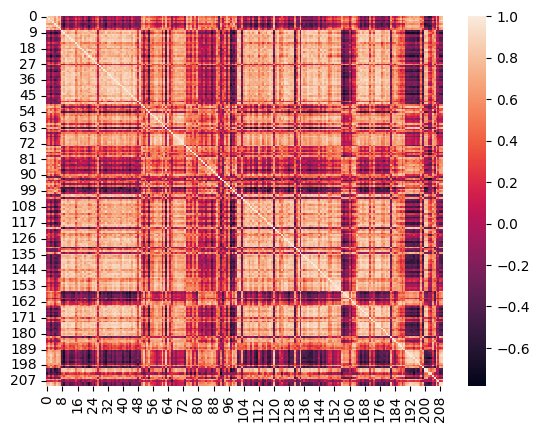

In [ ]:
sb.heatmap(corrm[30])

In [ ]:
sb.heatmap(corrm[31])

In [ ]:
sb.heatmap(corrm[32])

In [ ]:
sb.heatmap(corrm[33])

In [ ]:
sb.heatmap(corrm[34])

In [ ]:
sb.heatmap(corrm[35])

In [ ]:
sb.heatmap(corrm[36])